# ASSIGNMENT 1
## Reading Data from CSV

In [2]:
data<-read.csv('HousePrices.csv', header = TRUE)

In [11]:
housing_price = data$Price

# Answer to Question 1)

In [14]:
mean(housing_price)

[1] 130427.3

In [15]:
median(housing_price)

[1] 125950

In [26]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [18]:
Mode(housing_price)

[1] 117800

In [4]:
price_per_sq_ft = (data$Price)/(data$SqFt)

In [5]:
mean(price_per_sq_ft)

[1] 65.12688

In [6]:
median(price_per_sq_ft)

[1] 64.09632

In [27]:
Mode(price_per_sq_ft)

[1] 63.85475

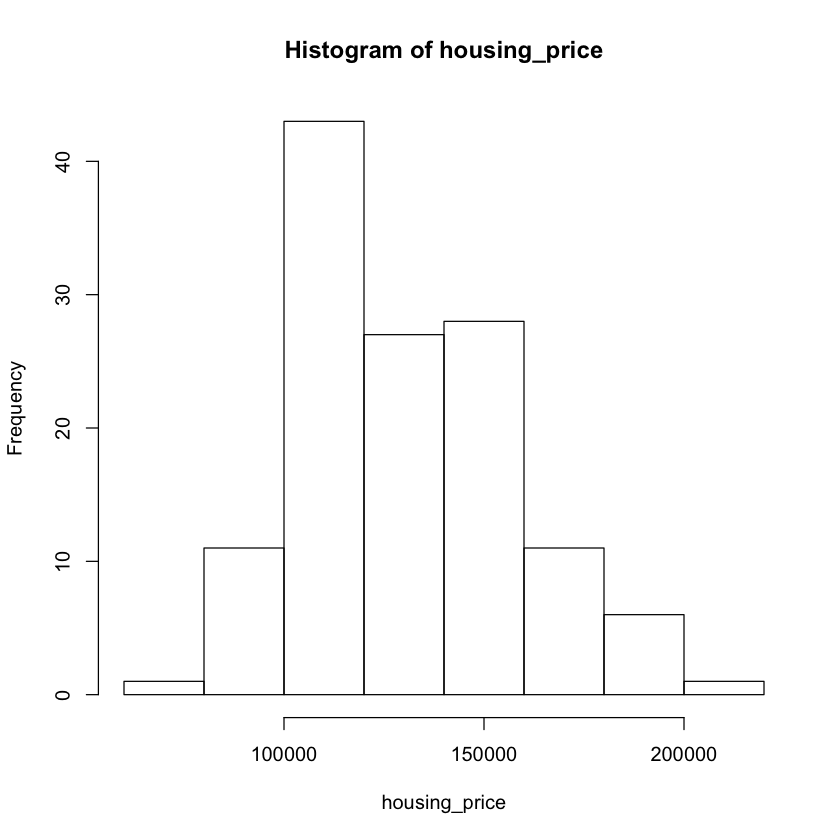

In [21]:
hist(housing_price)

## As it is right skewed, median will be much more appropriate to use for the central tendency.

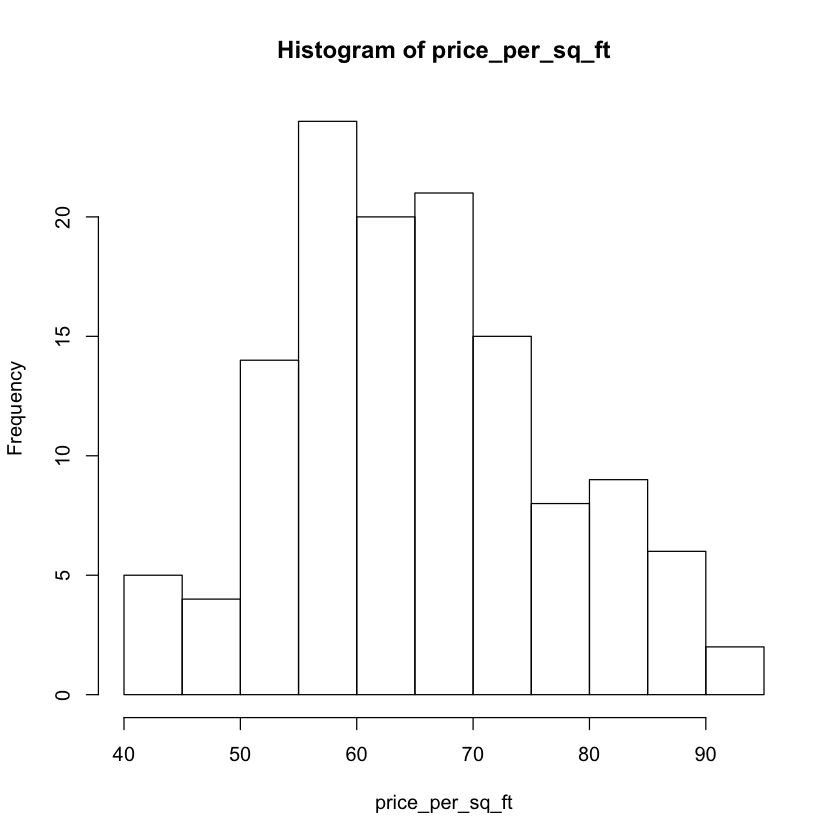

In [8]:
hist(price_per_sq_ft)

## In price per square feet, mean seems to be appropriate measure for the central tendency. Though it is not perfectly normally distributed, we can approximately consider mean to be the best measure for central tendency in this case.

In [162]:
east<-subset(data, Neighborhood=='East') 
north<-subset(data, Neighborhood=='North')
west<-subset(data, Neighborhood=='West')

In [165]:
cat('mean, median and standard deviation of east are: ',mean(east$Price), median(east$Price), sd(east$Price),'respectively, mean, median and standard deviation of west are: ', mean(west$Price), median(west$Price), sd(west$Price),
   'respectively, mean, median and standard deviation of north are: ', mean(north$Price), median(north$Price), sd(north$Price))

mean, median and standard deviation of east are:  125231.1 123100 17866.05 respectively, mean, median and standard deviation of west are:  159294.9 155400 19781.73 respectively, mean, median and standard deviation of north are:  110154.5 110750 15973.88

## mean, median and standard deviation of east are:  125231.1 123100 17866.05 respectively, mean, median and standard deviation of west are:  159294.9 155400 19781.73 respectively, mean, median and standard deviation of north are:  110154.5 110750 15973.88 respectively

In [167]:
cat(var(east$Price), var(west$Price), var(north$Price))

319195828 391316815 255164863

## ANSWER 2) variance of west side is greatest as we can see that it has mean value of approx 15950 dollars with sd of approx 19.7k dollars. Hence West region has the greatest variance.

## ANSWER 3) 
### Analysing the outliers in the dataset

In [27]:
range(housing_price)

[1]  69100 211200

In [28]:
boxplot.stats(housing_price
             )

$stats
[1]  69100 111250 125950 148600 199500

$n
[1] 128

$conf
[1] 120733.9 131166.1

$out
[1] 211200

## 1) Yes, there are outliers in the price dataset. Outlier = 211200

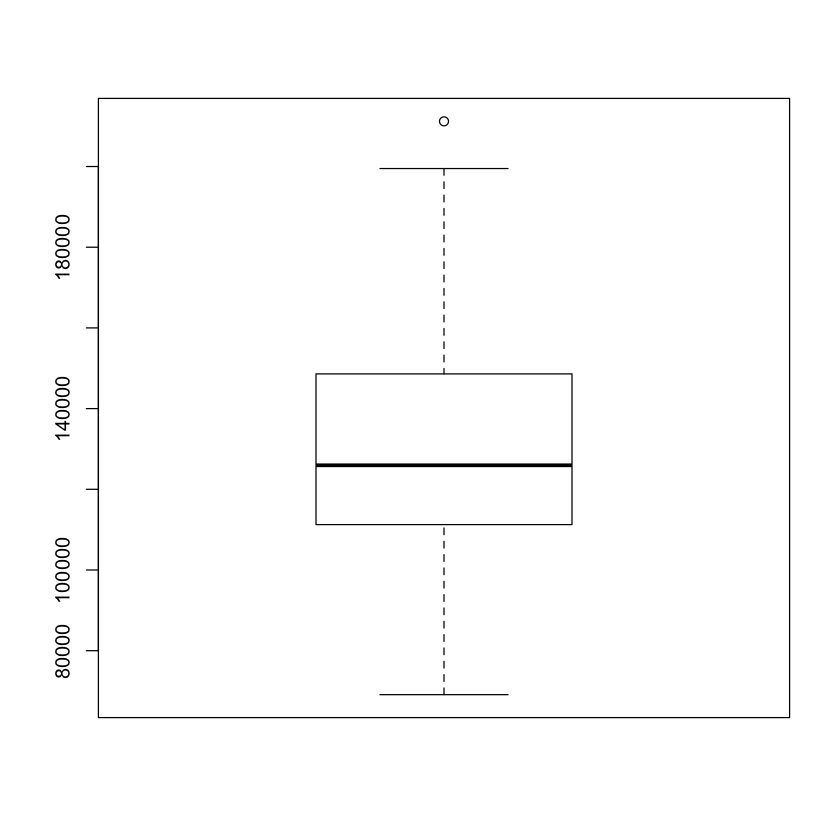

In [37]:
boxplot(housing_price)

In [9]:
boxplot.stats(price_per_sq_ft)

$stats
[1] 42.01005 56.98247 64.09632 72.81031 92.15686

$n
[1] 128

$conf
[1] 61.88591 66.30674

$out
numeric(0)

## 2) No, there are no outliers in the price per square feet dataset.

In [12]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}


In [15]:
housing_price_without_outliers<-remove_outliers(housing_price)

In [16]:
price_per_sq_ft_without_outliers<-remove_outliers(price_per_sq_ft)

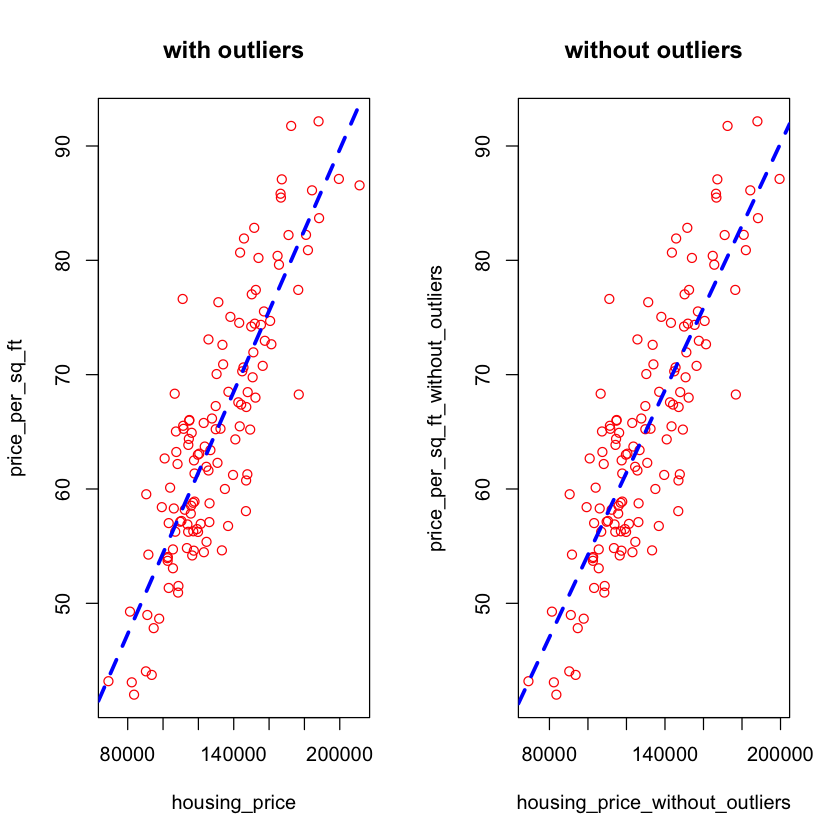

In [18]:

par(mfrow=c(1,2))
plot(housing_price, price_per_sq_ft, col = 'red', main = 'with outliers')
abline(lm(price_per_sq_ft~housing_price),col = 'blue', lwd= 3, lty = 2)
plot(housing_price_without_outliers, price_per_sq_ft_without_outliers, col = 'red', main = 'without outliers')
abline(lm(price_per_sq_ft_without_outliers~housing_price_without_outliers),col = 'blue', lwd= 3, lty = 2)

In [19]:
cat('mean with outliers is equal to : ', mean(housing_price), ',mean wihout outliers is equal to : ', mean(housing_price_without_outliers, na.rm=TRUE))

mean with outliers is equal to :  130427.3 ,mean wihout outliers is equal to :  129791.3

In [20]:
cat('standard deviation with outliers is equal to : ', sd(housing_price), ',standard deviation wihout outliers is equal to : ', sd(housing_price_without_outliers, na.rm=TRUE))

standard deviation with outliers is equal to :  26868.77 ,standard deviation wihout outliers is equal to :  25989.87

## Answer 3) standard deviation and mean decreased after removing outliers for housing price.

In [21]:
cat('mean with outliers is equal to : ', mean(price_per_sq_ft), ',mean wihout outliers is equal to : ', mean(price_per_sq_ft_without_outliers, na.rm=TRUE))

mean with outliers is equal to :  65.12688 ,mean wihout outliers is equal to :  65.12688

In [22]:
cat('standard deviation with outliers is equal to : ', sd(price_per_sq_ft), ',standard deviation wihout outliers is equal to : ', sd(price_per_sq_ft_without_outliers, na.rm=TRUE))

standard deviation with outliers is equal to :  11.09843 ,standard deviation wihout outliers is equal to :  11.09843

## No difference for the mean for price per square feet and standard deviation.

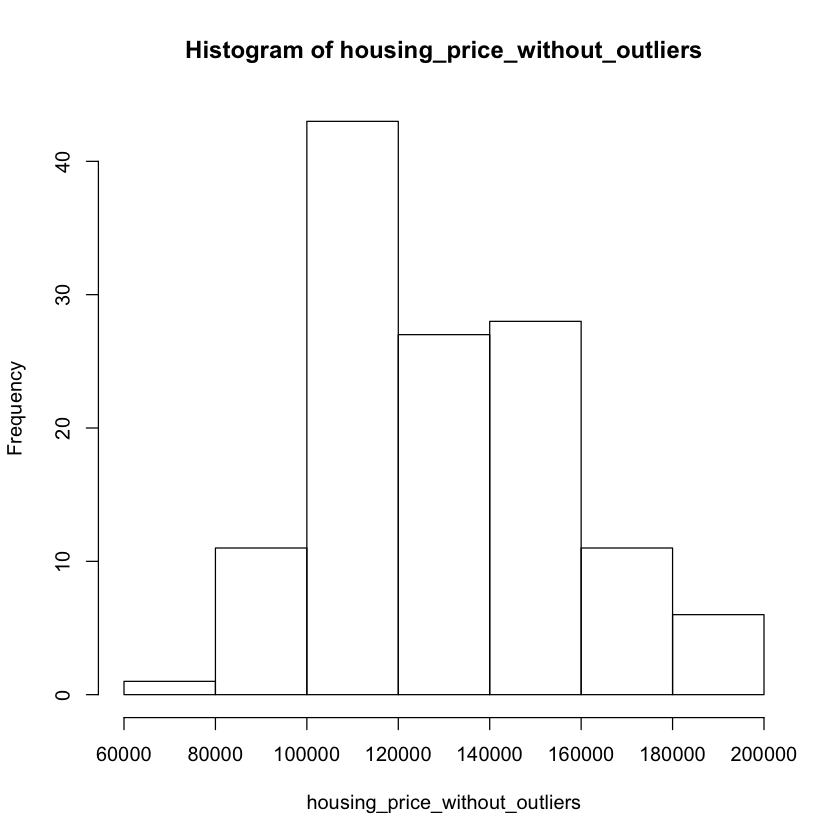

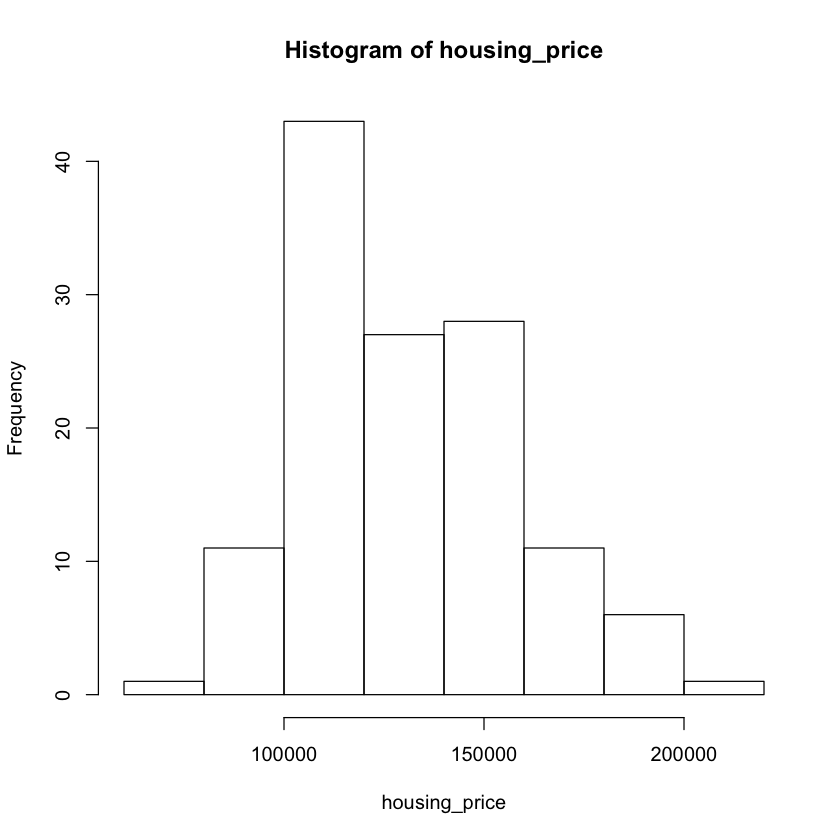

In [23]:
par(mfrow=c(1,1))
hist(housing_price_without_outliers)
hist(housing_price)

## Answer 4) 

In [24]:
offer<-data$Offers

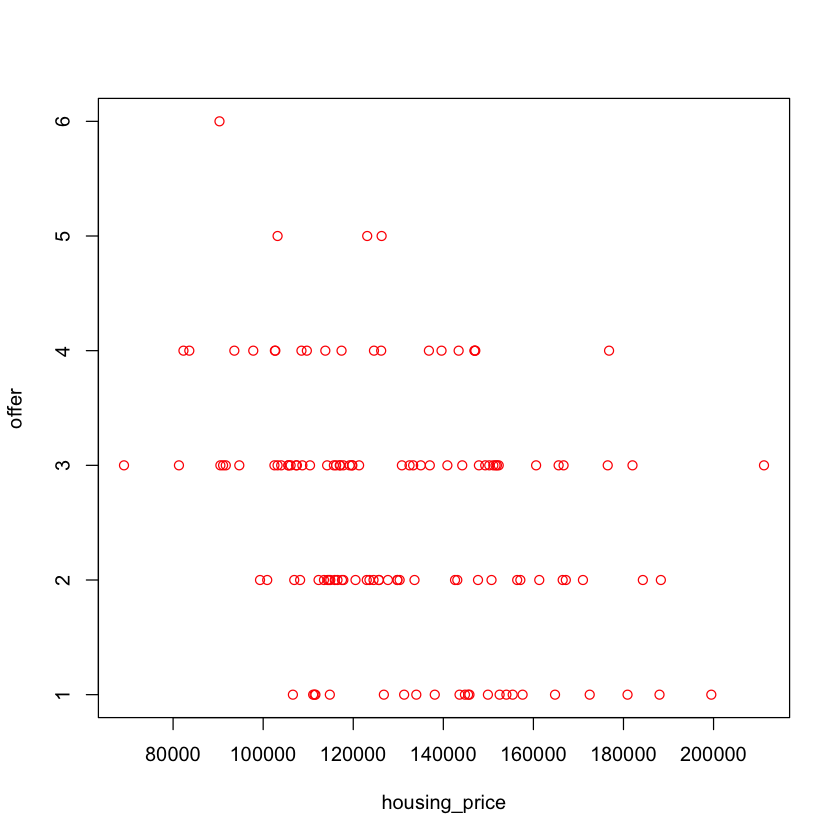

In [25]:
plot(housing_price,offer, col = 'red')
#lines(housing_price, offer, col = 'blue')

## PLOT INFERENCE: This plot basically tells us how many offers are there in a particular price range. The graph looks strange because majority of offers lie with the comparitively less expensive houses and very very few offers are there on the expensive ones.

In [168]:
cor(housing_price,offer)

[1] -0.3136359

## CORRELATION COEFFICIENT INFERENCE: The correlation coefficient of "-0.31" tells us that both, housing prices and offer are loosely and negatively correlated meaning there is no strong correlation between the two
